In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/titles_dataset.csv', )
df.head()

,Title,Label
0,گرفتن اسکرین‌شات از عکس پروفایل کاربران در وات...,فناوری
1,اگر موبایل‌ به آب افتاد آن را داخل برنج بگذاری...,فناوری
2,رونق جدید اقتصادی در آمریکا «در نتیجه استفاده ...,فناوری
3,مارک زاکربرگ: گجت پوشیدنی ذهن‌خوان متا به واقع...,فناوری
4,میثم سالاری: اینستاگرام ایران را تحریم کرده است,فناوری


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df['Title'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label'])

In [53]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [54]:
len(vectorizer.vocabulary_)

10892

In [55]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [56]:
y_pred = nb_classifier.predict(X_test_vectorized)

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9325
Classification Report:
               precision    recall  f1-score   support

       خارجی       0.91      0.95      0.93       400
       سلامت       0.95      0.92      0.94       400
      فناوری       0.90      0.94      0.92       400
         هنر       0.94      0.88      0.91       400
        ورزش       0.96      0.97      0.97       400

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



# Now Lets Vectorize using Chars

In [58]:
vectorizer = CountVectorizer(analyzer='char_wb')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [59]:
len(vectorizer.vocabulary_)

125

In [60]:
vectorizer.vocabulary_

{' ': 0,
 'ا': 61,
 'ف': 81,
 'ز': 71,
 'ی': 109,
 'ش': 73,
 'آ': 57,
 'م': 85,
 'ر': 70,
 'ه': 87,
 'د': 68,
 'غ': 79,
 'ب': 62,
 '۲': 112,
 '۷': 117,
 '۵': 115,
 '۸': 118,
 'ت': 63,
 'ن': 86,
 'ک': 106,
 'س': 72,
 '،': 53,
 'و': 88,
 'گ': 107,
 'ح': 66,
 'ق': 82,
 '\u200c': 120,
 'پ': 103,
 'ظ': 77,
 'ج': 65,
 'ل': 84,
 ':': 20,
 'خ': 67,
 '؟': 55,
 'ث': 64,
 '«': 50,
 '»': 52,
 'ع': 78,
 'ص': 74,
 'ط': 76,
 '؛': 54,
 'چ': 104,
 'ذ': 69,
 '۰': 110,
 '/': 9,
 'ض': 75,
 '۶': 116,
 '5': 15,
 'g': 30,
 'ِ': 95,
 'ُ': 94,
 '۳': 113,
 'ئ': 60,
 '2': 12,
 '0': 10,
 '۱': 111,
 'ژ': 105,
 'u': 44,
 's': 42,
 'b': 25,
 '-': 7,
 'c': 26,
 '!': 1,
 '+': 5,
 '۹': 119,
 '۴': 114,
 'd': 27,
 't': 43,
 'o': 38,
 'l': 35,
 'f': 29,
 'r': 41,
 'm': 36,
 'e': 28,
 'k': 34,
 'a': 24,
 'h': 31,
 'p': 39,
 'أ': 58,
 '"': 2,
 '3': 13,
 '.': 8,
 '1': 11,
 '9': 19,
 'ٔ': 96,
 '(': 3,
 ')': 4,
 'ً': 91,
 '\u200f': 123,
 'v': 45,
 'i': 32,
 '7': 17,
 '4': 14,
 'ۀ': 108,
 '٬': 102,
 'x': 47,
 'w': 46,
 '٪': 100

In [61]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [62]:
y_pred = nb_classifier.predict(X_test_vectorized)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

       خارجی       0.50      0.61      0.55       400
       سلامت       0.53      0.59      0.56       400
      فناوری       0.57      0.28      0.37       400
         هنر       0.51      0.51      0.51       400
        ورزش       0.54      0.64      0.58       400

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.51      2000
weighted avg       0.53      0.53      0.51      2000



# Now Lets Vectorize using Char ngrams

In [64]:
vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3,5))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [65]:
len(vectorizer.vocabulary_)

78248

In [66]:
vectorizer.vocabulary_

{' اف': 2512,
 'افز': 21779,
 'فزا': 49718,
 'زای': 40934,
 'ایش': 24788,
 'یش ': 73126,
 ' افز': 2530,
 'افزا': 21780,
 'فزای': 49723,
 'زایش': 40944,
 'ایش ': 24789,
 ' افزا': 2531,
 'افزای': 21782,
 'فزایش': 49724,
 'زایش ': 40945,
 ' آم': 1898,
 'آما': 17835,
 'مار': 53953,
 'ار ': 19859,
 ' آما': 1899,
 'آمار': 17839,
 'مار ': 53954,
 ' آمار': 1901,
 'آمار ': 17840,
 ' شه': 7414,
 'شهد': 45489,
 'هدا': 61193,
 'دای': 34161,
 'ای ': 24582,
 ' شهد': 7420,
 'شهدا': 45493,
 'هدای': 61213,
 'دای ': 34162,
 ' شهدا': 7421,
 'شهدای': 45496,
 'هدای ': 61214,
 ' غز': 8219,
 'غزه': 48787,
 'زه ': 41506,
 ' غزه': 8220,
 'غزه ': 48788,
 ' غزه ': 8221,
 ' به': 3615,
 'به ': 26876,
 ' به ': 3616,
 ' ۲۷': 13583,
 '۲۷۵': 76049,
 '۷۵۸': 76356,
 '۵۸۵': 76279,
 '۸۵ ': 76406,
 ' ۲۷۵': 13585,
 '۲۷۵۸': 76050,
 '۷۵۸۵': 76357,
 '۵۸۵ ': 76280,
 ' ۲۷۵۸': 13586,
 '۲۷۵۸۵': 76051,
 '۷۵۸۵ ': 76358,
 ' تن': 4328,
 'تن ': 29540,
 ' تن ': 4329,
 ' کی': 12766,
 'کیا': 69990,
 'یار': 71452,
 'ارس': 20124,
 'رست': 38

In [67]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [68]:
y_pred = nb_classifier.predict(X_test_vectorized)

In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.939
Classification Report:
               precision    recall  f1-score   support

       خارجی       0.92      0.94      0.93       400
       سلامت       0.96      0.92      0.94       400
      فناوری       0.91      0.94      0.93       400
         هنر       0.93      0.93      0.93       400
        ورزش       0.97      0.97      0.97       400

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [70]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[374   4  14   7   1]
 [  7 368  11   9   5]
 [  8   8 377   6   1]
 [ 11   2  10 370   7]
 [  5   1   1   4 389]]


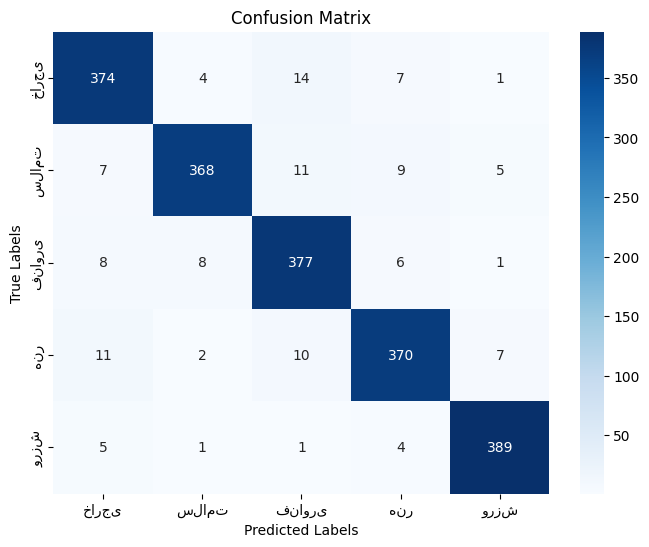

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [47]:
!pip install python-bidi
!pip install arabic_reshaper

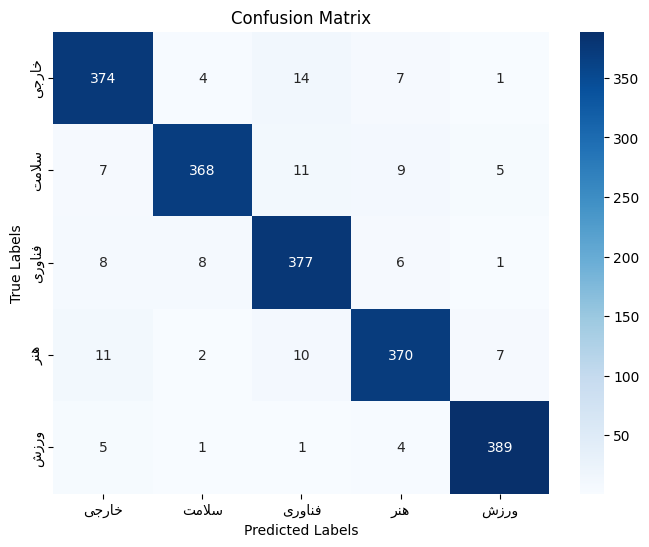

In [72]:
from bidi import algorithm as bidi_algorithm
import arabic_reshaper

rtl = lambda x : bidi_algorithm.get_display(arabic_reshaper.reshape(x))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[rtl(x) for x in (nb_classifier.classes_)], yticklabels=[rtl(x) for x in (nb_classifier.classes_)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [77]:
def inference(title: str):
    vectorized = vectorizer.transform([title])
    return nb_classifier.predict(vectorized)

In [84]:
inference('ایلان ماسک آدم بدی است')

array(['فناوری'], dtype='<U6')